### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





# Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
#Lets examine the dataset
data.shape
print('We see (12684 rows , 26 columns)\n')

#Lets get the information about the dataset
data.info()

print('\n')

'''We can see all column names, data types, Non Null counts etc.'''



We see (12684 rows , 26 columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Ba

'We can see all column names, data types, Non Null counts etc.'

In [6]:
# Lets examine for missing values in the dataset
# This returns the count of null values for each column
data.isnull().sum()


#This gives us all columns and total number of rows having null values
#car                     12576
#Bar                       107
#CoffeeHouse               217
#CarryAway                 151
#RestaurantLessThan20      130
#Restaurant20To50          189


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [7]:
# Looking at car column as it mostly null, we can totally ignore that column from dataset for our analysis purpose
# Whereas other columns such as Bar CoffeHouse CarryAway RestaurantLessThan20 and Restaurant20To50 looks fine having less null values 

#Lets drop the 'car' column
data = data.drop('car', axis = 1)



In [8]:
#Lets check the shape again
data.shape

(12684, 25)

In [9]:
#Lets check for any duplicate rows 
duplicates = data.duplicated().sum()
print('No of duplicate records is', duplicates)

#We found 74 rows duplicate that can be removed

No of duplicate records is 74


In [10]:
#Lets remove duplicates
allrecords = data.shape[0]
data = data.drop_duplicates()

In [11]:
#Lets check the shape again
print('Removed duplicate records:',allrecords - data.shape[0])
print(data.shape)

Removed duplicate records: 74
(12610, 25)


In [12]:
#Now we will remove rows that have missing values
data = data.dropna()

In [13]:
#Lets check shape again
data.shape

(12007, 25)

4. What proportion of the total observations chose to accept the coupon?



In [14]:
#Total observations that accepted coupon
noOfYes = data[data['Y'] == 1]['Y'].sum()
totalRecords = data.shape[0]
proportion = noOfYes / totalRecords

print(f"No of acceptance {noOfYes} ")
print(f"Total Observations {totalRecords}")

print(f"Proportion of Observations that chose to accept the coupon {proportion}")
print(f"Proportion Percentage {proportion * 100}")


No of acceptance 6825 
Total Observations 12007
Proportion of Observations that chose to accept the coupon 0.5684184225868244
Proportion Percentage 56.84184225868244


5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Distribution of Coupons')

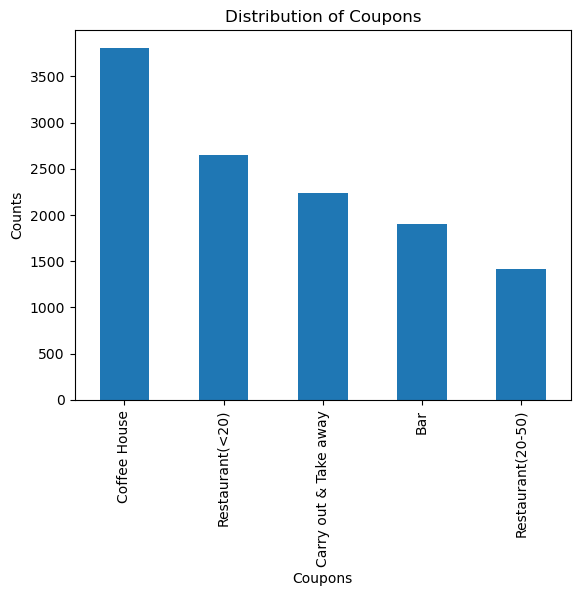

In [15]:
data['coupon'].value_counts().plot.bar()
plt.xticks(rotation=90)
plt.xlabel('Coupons')
plt.ylabel('Counts')
plt.title('Distribution of Coupons')

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Distribution of Temperature')

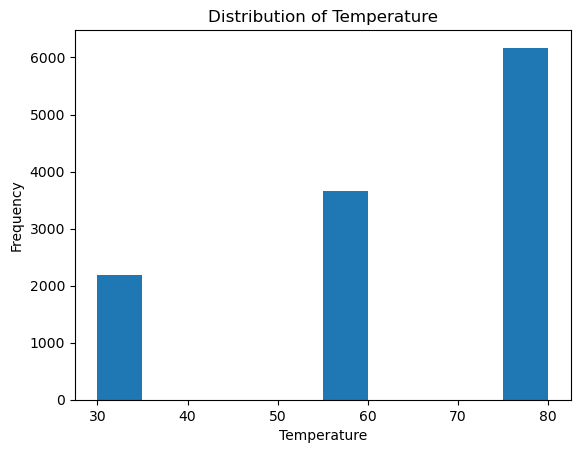

In [16]:
data['temperature'].plot.hist()
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Distribution of Temperature")



***total_coupons_by_types***
                          Y
coupon                     
Bar                    1906
Carry out & Take away  2233
Coffee House           3809
Restaurant(20-50)      1413
Restaurant(<20)        2646

*** accepted_coupons_by_types ***
                          Y
coupon                     
Bar                     785
Carry out & Take away  1643
Coffee House           1888
Restaurant(20-50)       631
Restaurant(<20)        1878

*** proportion_accepted_coupons in percentage***
                               Y
coupon                          
Bar                    41.185729
Carry out & Take away  73.578146
Coffee House           49.566815
Restaurant(20-50)      44.656759
Restaurant(<20)        70.975057




"Hypothesis: Based on the observation, 'carry out' and 'restaurant<20' are the most accepted coupons "

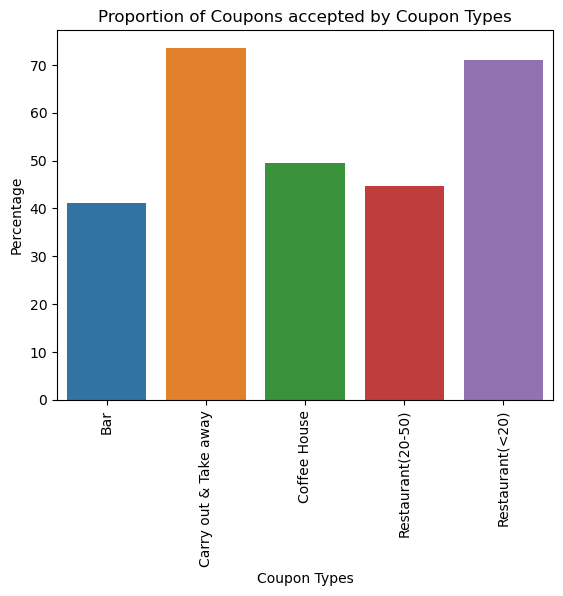

In [17]:
#Lets compare the acceptance rate of different coupons
#We will aggregate different categories of coupon and find out the acceptance proportions

total_coupons_by_types = data.groupby('coupon').count()[['Y']]
print('***total_coupons_by_types***')
print(total_coupons_by_types)

accepted_coupons_by_types = data.groupby('coupon').sum()[['Y']]
print('\n*** accepted_coupons_by_types ***')
print(accepted_coupons_by_types)

proportion_accepted_coupons = accepted_coupons_by_types  / total_coupons_by_types;
proportion_accepted_coupons['Y'] = proportion_accepted_coupons['Y'] * 100

print('\n*** proportion_accepted_coupons in percentage***')
print(proportion_accepted_coupons)

#Lets plot the Bar Plot for Acceptance Proportion by Coupon Types
print('\n')
sns.barplot(x='coupon', y='Y' , data=proportion_accepted_coupons, hue='coupon')
plt.xticks(rotation=90)
plt.title("Proportion of Coupons accepted by Coupon Types")
plt.xlabel("Coupon Types")
plt.ylabel("Percentage")

#Hypothesis
'''Hypothesis: Based on the observation, 'carry out' and 'restaurant<20' are the most accepted coupons '''



'Hypothesis: Females vs Males accceptance is almost same'

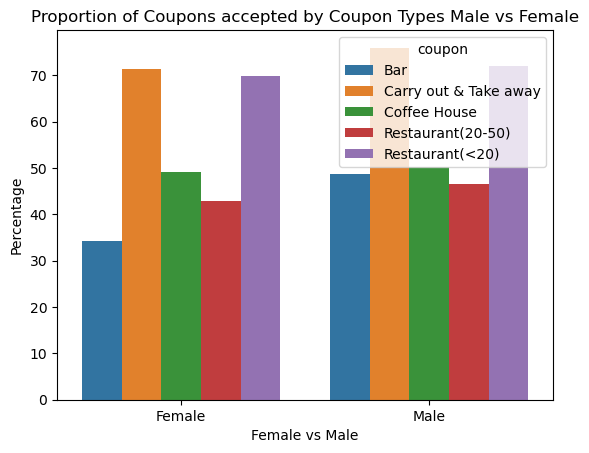

In [18]:
#Lets compare the acceptance rate of different coupons by Male vs Female

total_coupons_by_types = data.groupby(['coupon','gender']).count()[['Y']]
accepted_coupons_by_types = data.groupby(['coupon','gender']).sum()[['Y']]

proportion_accepted_coupons = accepted_coupons_by_types  / total_coupons_by_types;
proportion_accepted_coupons['Y'] = proportion_accepted_coupons['Y'] * 100

#Lets plot the Bar Plot for Acceptance Proportion by Coupon Types
print('\n')
sns.barplot(x='gender', y='Y' , data=proportion_accepted_coupons, hue='coupon')
plt.title("Proportion of Coupons accepted by Coupon Types Male vs Female")
plt.xlabel("Female vs Male")
plt.ylabel("Percentage")

'''Hypothesis: Females vs Males accceptance is almost same'''



'Hypothesis: Females vs Males accceptance is almost same, but overall female acceptance is slightly lower then Male in all coupons'

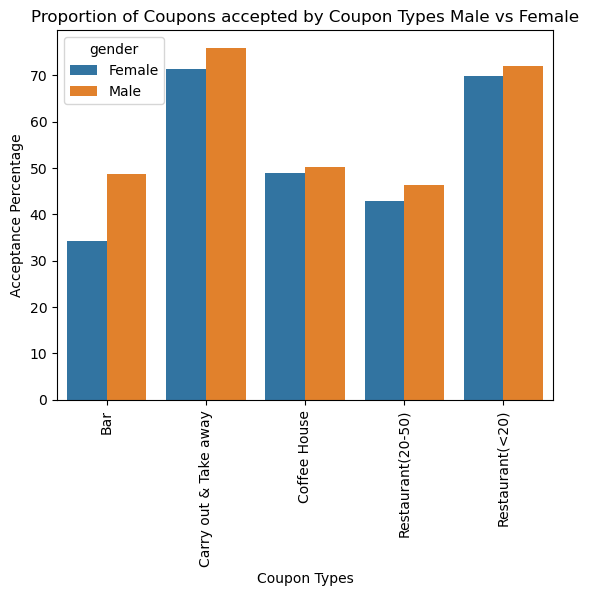

In [19]:
#Lets plot the Bar Plot for Acceptance Proportion by Coupon Types comparing Male vs Female
print('\n')
ax = sns.barplot(x='coupon', y='Y' , data=proportion_accepted_coupons, hue='gender')
plt.title("Proportion of Coupons accepted by Coupon Types Male vs Female")
plt.xlabel("Coupon Types")
plt.ylabel("Acceptance Percentage")
plt.xticks(rotation=90)

proportion_accepted_coupons

'''Hypothesis: Females vs Males accceptance is almost same, but overall female acceptance is slightly lower then Male in all coupons'''



**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [32]:
#Dataframe that contains only 'bar coupons'
bar_coupons = data[data['coupon']=='Bar'].copy()
bar_coupons.shape


(1906, 25)

2. What proportion of bar coupons were accepted?

In [21]:
#No of bar coupons accepted
total_no_of_records_bar_coupon = bar_coupons.shape[0]
print(f"total_no_of_records_bar_coupon: {total_no_of_records_bar_coupon}")

no_of_bar_coupons_accepted = bar_coupons[bar_coupons['Y'] == 1]['Y'].sum()
print(f"no_of_bar_coupons_accepted {no_of_bar_coupons_accepted}")

proportion_of_bar_coupons_accepted = no_of_bar_coupons_accepted / total_no_of_records_bar_coupon

print(f"proportion_of_bar_coupons_accepted {proportion_of_bar_coupons_accepted}")
print(f"proportion_of_bar_coupons_accepted in percentage {proportion_of_bar_coupons_accepted * 100}")


total_no_of_records_bar_coupon: 1906
no_of_bar_coupons_accepted 785
proportion_of_bar_coupons_accepted 0.4118572927597062
proportion_of_bar_coupons_accepted in percentage 41.185729275970616


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [33]:
#Lets check the values of 'Bar' columns
bar_coupons['Bar'].value_counts()                

visited_3_or_less = bar_coupons[bar_coupons['Bar'].isin(['never', 'less1', '1~3'])]
visited_3_or_less_count = visited_3_or_less['Bar'].value_counts().sum()

visited_more_than_3 = bar_coupons[bar_coupons['Bar'].isin(['4~8', 'gt8'])]
visited_more_than_3_count = len(visited_more_than_3)

print(f"visited_3_or_less_count {visited_3_or_less_count}")
print(f"visited_more_than_3_count {visited_more_than_3_count}")

accepted_visited_3_or_less_count = visited_3_or_less[visited_3_or_less['Y'] == 1]['Y'].sum()
accepted_visited_more_than_3_count = visited_more_than_3[visited_more_than_3['Y'] == 1]['Y'].sum()

proportion_accepted_visited_3_or_less = accepted_visited_3_or_less_count / visited_3_or_less_count
proportion_accepted_visited_more_than_3 = accepted_visited_more_than_3_count / visited_more_than_3_count

print(f"proportion_accepted_visited_3_or_less: {proportion_accepted_visited_3_or_less}")
print(f"proportion_accepted_visited_more_than_3: {proportion_accepted_visited_more_than_3}")

print(f"proportion_accepted_visited_3_or_less Percentage: {proportion_accepted_visited_3_or_less * 100}")
print(f"proportion_accepted_visited_more_than_3 Percentage: {proportion_accepted_visited_more_than_3 * 100}")


visited_3_or_less_count 1713
visited_more_than_3_count 193
proportion_accepted_visited_3_or_less: 0.37244600116754234
proportion_accepted_visited_more_than_3: 0.7616580310880829
proportion_accepted_visited_3_or_less Percentage: 37.244600116754235
proportion_accepted_visited_more_than_3 Percentage: 76.16580310880829


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [50]:
drivers_visit_bar_more_than_once_a_month = bar_coupons[bar_coupons['Bar'].isin(['1~3','4~8', 'gt8'])]
drivers_visit_bar_more_than_once_a_month_count = drivers_visit_bar_more_than_once_a_month['Y'].sum()
print(f"drivers_visit_bar_more_than_once_a_month_count: {drivers_visit_bar_more_than_once_a_month_count}")

#Lets check the values in age column
age_data = bar_coupons['age'].value_counts()
age_over_25_list = ['26', '31', '36', '41', '46', '50plus']

#Finding drivers who visits bar more then once per month and over age 25
drivers_visit_bar_more_than_once_a_month_and_over_age_25 = drivers_visit_bar_more_than_once_a_month[drivers_visit_bar_more_than_once_a_month['age'].isin(age_over_25_list)]
drivers_visit_bar_more_than_once_a_month_and_over_age_25_count = drivers_visit_bar_more_than_once_a_month_and_over_age_25[drivers_visit_bar_more_than_once_a_month_and_over_age_25['Y'] == 1]['Y'].sum()
print(f"drivers_visit_bar_more_than_once_a_month_and_over_age_25_count: {drivers_visit_bar_more_than_once_a_month_and_over_age_25_count}")

proportion_drivers_visit_bar_more_than_once_a_month_and_over_age_25 = drivers_visit_bar_more_than_once_a_month_and_over_age_25_count / drivers_visit_bar_more_than_once_a_month_count
print(f"proportion_drivers_visit_bar_more_than_once_a_month_and_over_age_25: {proportion_drivers_visit_bar_more_than_once_a_month_and_over_age_25}")
print(f"proportion_drivers_visit_bar_more_than_once_a_month_and_over_age_25 Percentage: {proportion_drivers_visit_bar_more_than_once_a_month_and_over_age_25 * 100}")

drivers_visit_bar_more_than_once_a_month_and_under_age_25 = drivers_visit_bar_more_than_once_a_month[~drivers_visit_bar_more_than_once_a_month['age'].isin(age_over_25_list)]
drivers_visit_bar_more_than_once_a_month_and_under_age_25_count = drivers_visit_bar_more_than_once_a_month_and_under_age_25[drivers_visit_bar_more_than_once_a_month_and_under_age_25['Y'] == 1]['Y'].sum()
print(f"\ndrivers_visit_bar_more_than_once_a_month_and_under_age_25_count: {drivers_visit_bar_more_than_once_a_month_and_under_age_25_count}")


proportion_drivers_visit_bar_more_than_once_a_month_and_under_age_25 = drivers_visit_bar_more_than_once_a_month_and_under_age_25_count / drivers_visit_bar_more_than_once_a_month_count
print(f"proportion_drivers_visit_bar_more_than_once_a_month_and_under_age_25: {proportion_drivers_visit_bar_more_than_once_a_month_and_under_age_25}")
print(f"proportion_drivers_visit_bar_more_than_once_a_month_and_under_age_25 Percentage: {proportion_drivers_visit_bar_more_than_once_a_month_and_under_age_25 * 100}")


drivers_visit_bar_more_than_once_a_month_count: 392
drivers_visit_bar_more_than_once_a_month_and_over_age_25_count: 278
proportion_drivers_visit_bar_more_than_once_a_month_and_over_age_25: 0.7091836734693877
proportion_drivers_visit_bar_more_than_once_a_month_and_over_age_25 Percentage: 70.91836734693877

drivers_visit_bar_more_than_once_a_month_and_under_age_25_count: 114
proportion_drivers_visit_bar_more_than_once_a_month_and_under_age_25: 0.29081632653061223
proportion_drivers_visit_bar_more_than_once_a_month_and_under_age_25 Percentage: 29.081632653061224


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [51]:
#Lets examine the passengers column data
print("*** Kind of Passengers ***")
print(bar_coupons['passanger'].value_counts())
not_kid_passenger_list = ['Alone','Friend(s)','Partner']

*** Kind of Passengers ***
passanger
Alone        1139
Friend(s)     316
Partner       259
Kid(s)        192
Name: count, dtype: int64


In [52]:
#Lets examine occupation column data
bar_coupons['occupation'].value_counts()

occupation
Unemployed                                   292
Student                                      237
Computer & Mathematical                      222
Sales & Related                              175
Education&Training&Library                   125
Management                                   104
Office & Administrative Support              101
Arts Design Entertainment Sports & Media      88
Business & Financial                          82
Retired                                       71
Healthcare Support                            44
Food Preparation & Serving Related            43
Community & Social Services                   40
Healthcare Practitioners & Technical          36
Transportation & Material Moving              35
Legal                                         34
Protective Service                            27
Architecture & Engineering                    27
Personal Care & Service                       25
Construction & Extraction                     24
Life Phys

In [53]:
#Lets filter records by 'Farming Fishing & Forestry'
drivers_visit_bar_more_than_once_a_month = bar_coupons[bar_coupons['Bar'].isin(['1~3','4~8', 'gt8'])]
drivers_visit_bar_more_than_once_a_month_count = len(drivers_visit_bar_more_than_once_a_month)
print(f"drivers_visit_bar_more_than_once_a_month_count {drivers_visit_bar_more_than_once_a_month_count}")

#Creating 'df' new short variable to work with by assigning 'drivers_visit_bar_more_than_once_a_month'
df = drivers_visit_bar_more_than_once_a_month

#Filter by Occupation not 'Farming Fishing & Forestry'
df = df[df['occupation'] != 'Farming Fishing & Forestry']

acceptance_yes = df[df['Y'] == 1 & df['passanger'].isin(not_kid_passenger_list)]['Y'].sum()
proportion_acceptance_yes = acceptance_yes / len(drivers_visit_bar_more_than_once_a_month)

print('\nAcceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.\n')
print(f"proportion_acceptance_yes: {proportion_acceptance_yes}")
print(f"proportion_acceptance_yes percentage: {proportion_acceptance_yes * 100}")

acceptance_yes_with_kid_passanger = df[df['Y'] == 1 & ~df['passanger'].isin(not_kid_passenger_list)]['Y'].sum()
proportion_acceptance_yes_with_kid_passanger = acceptance_yes_with_kid_passanger / len(drivers_visit_bar_more_than_once_a_month)

print(f"proportion_acceptance_yes_with_kid_passanger: {proportion_acceptance_yes_with_kid_passanger}")
print(f"proportion_acceptance_yes_with_kid_passanger percentage: {proportion_acceptance_yes_with_kid_passanger * 100}")




drivers_visit_bar_more_than_once_a_month_count 572

Acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

proportion_acceptance_yes: 0.6573426573426573
proportion_acceptance_yes percentage: 65.73426573426573
proportion_acceptance_yes_with_kid_passanger: 0.027972027972027972
proportion_acceptance_yes_with_kid_passanger percentage: 2.797202797202797


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [54]:
#Lets get the dataframe for drivers visit bar more than once a month
df = drivers_visit_bar_more_than_once_a_month

#Lets examine 'maritalStatus' column
df['maritalStatus'].value_counts()

#Lets check the values in age column
bar_coupons['age'].value_counts()

not_widowed = ['Single', 'Married partner', 'Unmarried partner', 'Divorced']
age_under_30 = ['21','26','below21']

#go to bars more than once a month, had passengers that were not a kid, and were not widowed 
ans1 = df[df['passanger'].isin(not_kid_passenger_list) & df['maritalStatus'].isin(not_widowed)]
ans1_acceptance = ans1[ans1['Y'] == 1]['Y'].sum() / len(ans1)
print(f"1. Go to Bar more than once and no kid passenger and were not widowed count={ans1.value_counts().sum()} acceptance percent={ans1_acceptance * 100}")

#go to bars more than once a month and are under the age of 30
ans2 = df[df['age'].isin(age_under_30)]
ans2_acceptance = ans2[ans2['Y'] == 1]['Y'].sum() / len(ans2)
print(f"2. Go to Bar more than once and under age 30 count={ans2.value_counts().sum()} acceptance percent={ans2_acceptance * 100}")

#go to cheap restaurants more than 4 times a month and income is less than 50K.

#Lets examine income column data
df['income'].sort_values().value_counts()
income_less_than_50K = ['$12500 - $24999','$25000 - $37499','$37500 - $49999','Less than $12500']

#Lets examine 'RestaurantLessThan20' column data
df['RestaurantLessThan20'].value_counts()
visit_cheap_restaurants_more_than_4times_month = ['4~8','gt8']

ans3 = bar_coupons[bar_coupons['RestaurantLessThan20'].isin(visit_cheap_restaurants_more_than_4times_month) &
                        bar_coupons['income'].isin(income_less_than_50K)]
ans3_acceptance = ans3[ans3['Y'] == 1]['Y'].sum() / len(ans3)

print(f"3. Go to cheap restaurents and income under 50K count={ans3.value_counts().sum()} acceptance percent={ans3_acceptance * 100}")

1. Go to Bar more than once and no kid passenger and were not widowed count=530 acceptance percent=70.94339622641509
2. Go to Bar more than once and under age 30 count=328 acceptance percent=71.95121951219512
3. Go to cheap restaurents and income under 50K count=333 acceptance percent=45.645645645645644


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Text(0, 0.5, 'Percentage')

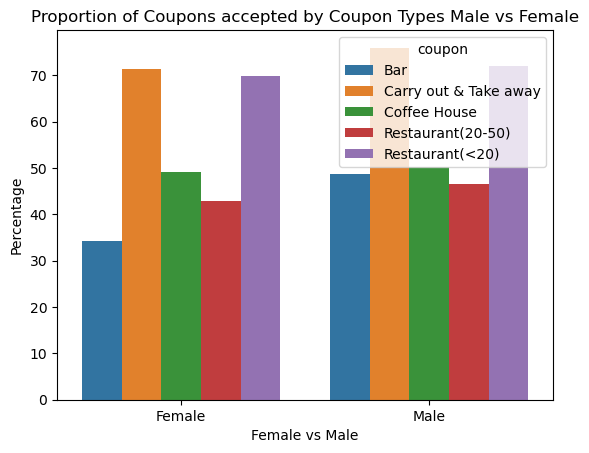

Y
coupon                gender           
Bar                   Female  34.175935
                      Male    48.745911
Carry out & Take away Female  71.341463
                      Male    75.944700
Coffee House          Female  49.033571
                      Male    50.135648
Restaurant(20-50)     Female  42.897328
                      Male    46.438746
Restaurant(<20)       Female  69.940476
                      Male    72.043011

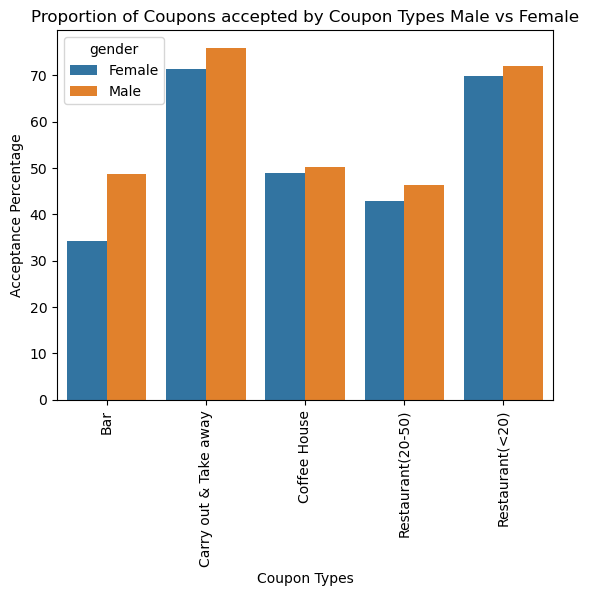

In [313]:
#Lets create a Dataframe that contains only 'Coffee House' coupons'
coffee_house = data[data['coupon']=='Coffee House'].copy()


In [372]:
#No of coffee house coupons accepted
total_no_of_records_coffee_house_coupon = coffee_house.shape[0]
print(f"total_no_of_records_coffee_house_coupon: {total_no_of_records_coffee_house_coupon}")

no_of_coffee_house_coupons_accepted = coffee_house[coffee_house['Y'] == 1]['Y'].sum()
print(f"no_of_coffee_house_coupons_accepted {no_of_coffee_house_coupons_accepted}")

proportion_of_coffee_house_coupons_accepted = no_of_coffee_house_coupons_accepted / total_no_of_records_coffee_house_coupon

print(f"proportion_of_coffee_house_coupons_accepted {proportion_of_coffee_house_coupons_accepted}")
print(f"proportion_of_coffee_house_coupons_accepted in percentage {proportion_of_coffee_house_coupons_accepted * 100}")

#Hypothesis
'''Acceptance rate is about 50%'''

total_no_of_records_coffee_house_coupon: 3809
no_of_coffee_house_coupons_accepted 1888
proportion_of_coffee_house_coupons_accepted 0.495668154371226
proportion_of_coffee_house_coupons_accepted in percentage 49.5668154371226


'Acceptance rate is about 50%'

In [373]:
#Lets categorize by age on acceptance of Coffee House Coupons
#Lets check the values in age column
age_data = coffee_house['age'].value_counts()

age_over_25_list = ['26', '31', '36', '41', '46', '50plus']
age_under_30 = ['21','26','below21']

print(f"Total Coffee House Coupons {coffee_house.shape[0]}")
coffee_house_coupons_accepted = coffee_house[coffee_house['Y'] == 1]
print(f"Accepted Coffee House Coupons {coffee_house_coupons_accepted.shape[0]}")

coffee_house_coupons_accepted_age_under_30 = coffee_house_coupons_accepted.query('age in @age_under_30')
print(f"Accepted Coffee House Coupons Under age 30: {coffee_house_coupons_accepted_age_under_30.shape[0]}")

coffee_house_coupons_accepted_age_over_30 = coffee_house_coupons_accepted.query('age not in @age_under_30')
print(f"Accepted Coffee House Coupons Over age 30: {coffee_house_coupons_accepted_age_over_30.shape[0]}")

proportion_coffee_house_coupons_accepted_age_under_30 = coffee_house_coupons_accepted_age_under_30.shape[0] / coffee_house_coupons_accepted.shape[0]
print(f"Proportion Accepted Coffee House Coupons Under age 30 Percentage: {proportion_coffee_house_coupons_accepted_age_under_30 * 100}")

proportion_coffee_house_coupons_accepted_over_30 = coffee_house_coupons_accepted_age_over_30.shape[0] / coffee_house_coupons_accepted.shape[0]
print(f"Proportion Accepted Coffee House Coupons Over age 30 Percentage: {proportion_coffee_house_coupons_accepted_over_30 * 100}")

#Hypothesis
'''Acceptance by age group below 30 and over 30 is almost similar'''



Total Coffee House Coupons 3809
Accepted Coffee House Coupons 1888
Accepted Coffee House Coupons Under age 30: 943
Accepted Coffee House Coupons Over age 30: 945
Proportion Accepted Coffee House Coupons Under age 30 Percentage: 49.94703389830508
Proportion Accepted Coffee House Coupons Over age 30 Percentage: 50.05296610169492


'Acceptance by age group below 30 and over 30 is almost similar'

In [374]:
#Lets examine income column data
coffee_house['income'].sort_values().value_counts()
income_less_than_50K = ['$12500 - $24999','$25000 - $37499','$37500 - $49999','Less than $12500']

coffee_house_coupons_accepted_income_less_than_50k = coffee_house_coupons_accepted.query('income in @income_less_than_50K')
print(f"Accepted Coffee House Coupons income under 50K : {coffee_house_coupons_accepted_income_less_than_50k.shape[0]}")

coffee_house_coupons_accepted_income_over_50k = coffee_house_coupons_accepted.query('income not in @income_less_than_50K')
print(f"Accepted Coffee House Coupons income over 50k: {coffee_house_coupons_accepted_income_over_50k.shape[0]}")

proportion_coffee_house_coupons_income_less_than_50k = coffee_house_coupons_accepted_income_less_than_50k.shape[0] / coffee_house_coupons_accepted.shape[0]
print(f"Proportion Accepted Coffee House Coupons Income under 50K Percentage: {proportion_coffee_house_coupons_income_less_than_50k * 100}")

proportion_coffee_house_coupons_income_over_50k = coffee_house_coupons_accepted_income_over_50k.shape[0] / coffee_house_coupons_accepted.shape[0]
print(f"Proportion Accepted Coffee House Coupons Income over 50K Percentage: {proportion_coffee_house_coupons_income_over_50k * 100}")

#Hypothesis
'''Acceptance rate is higher for income under 50K'''

Accepted Coffee House Coupons income under 50K : 1066
Accepted Coffee House Coupons income over 50k: 822
Proportion Accepted Coffee House Coupons Income under 50K Percentage: 56.46186440677966
Proportion Accepted Coffee House Coupons Income over 50K Percentage: 43.53813559322034


'Acceptance rate is higher for income under 50K'

" Highest acceptance by 'Unemployed', 'Student' , 'Computer & Mathematical' compared to rest of the occupations!!! "

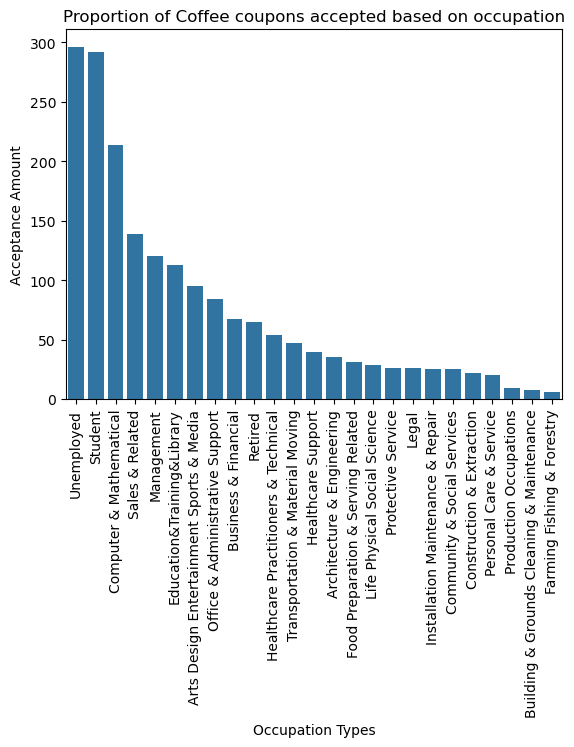

In [375]:
#Lets examine occupation and relationship with acceptance
coffee_house_coupons_accepted = coffee_house[coffee_house['Y'] == 1]
df = coffee_house_coupons_accepted['occupation'].value_counts()
ax = sns.barplot(df)
plt.title("Proportion of Coffee coupons accepted based on occupation")
plt.xlabel("Occupation Types")
plt.ylabel("Acceptance Amount")
plt.xticks(rotation=90)

#Hypothesis
''' Highest acceptance by 'Unemployed', 'Student' , 'Computer & Mathematical' compared to rest of the occupations!!! '''

'Sunny Weather has higher acceptance!!!'

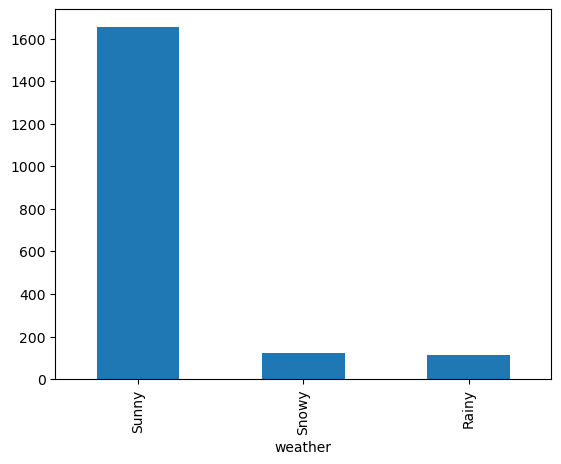

In [376]:
#Lets examine weather column and relation with Acceptance
coffee_house_coupons_accepted = coffee_house[coffee_house['Y'] == 1]
coffee_house_coupons_accepted['weather'].value_counts().plot.bar()

#Hypothesis
'''Sunny Weather has higher acceptance!!!'''

'pretty even acceptance rate between Male vs Female'

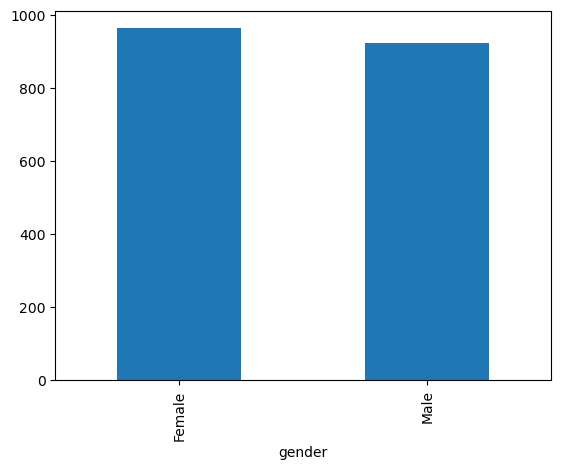

In [377]:
#Lets examine gender column data
coffee_house_coupons_accepted = coffee_house[coffee_house['Y'] == 1]
coffee_house_coupons_accepted['gender'].value_counts().plot.bar()

#Hypothesis
'''pretty even acceptance rate between Male vs Female'''

'Highest acceptance is early morning between 7AM - 10 AM and second highest is 6 PM and lowest is in night 10 PM '

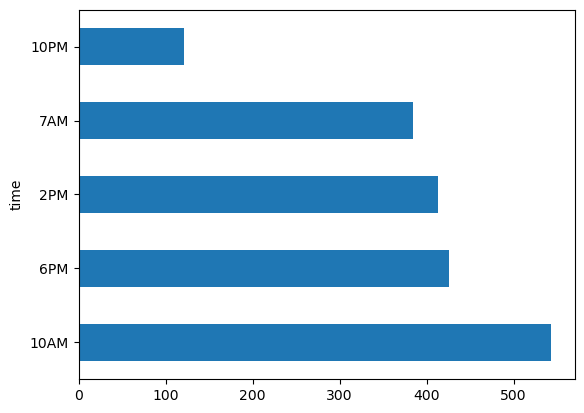

In [378]:
#Lets examine 'time' relationship with acceptance
coffee_house_coupons_accepted = coffee_house[coffee_house['Y'] == 1]
coffee_house_coupons_accepted['time'].value_counts().plot.barh()

#Hypothesis
'''Highest acceptance is early morning between 7AM - 10 AM and second highest is 6 PM and lowest is in night 10 PM ''' 